In [35]:
db_path = '../data/data.db'
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

#German states in English
states = ['Brandenburg/Berlin','Brandenburg','Baden-Wuerttemberg','Bayern','Hessen','Mecklenburg-Vorpommern','Niedersachsen','Niedersachsen/Hamburg/Bremen','Nordrhein-Westfalen','Rheinland-Pfalz','Schleswig-Holstein','Saarland','Sachsen','Sachsen-Anhalt','Thueringen/Sachsen-Anhalt','Thueringen']

## How has the global CO2 changed during the years

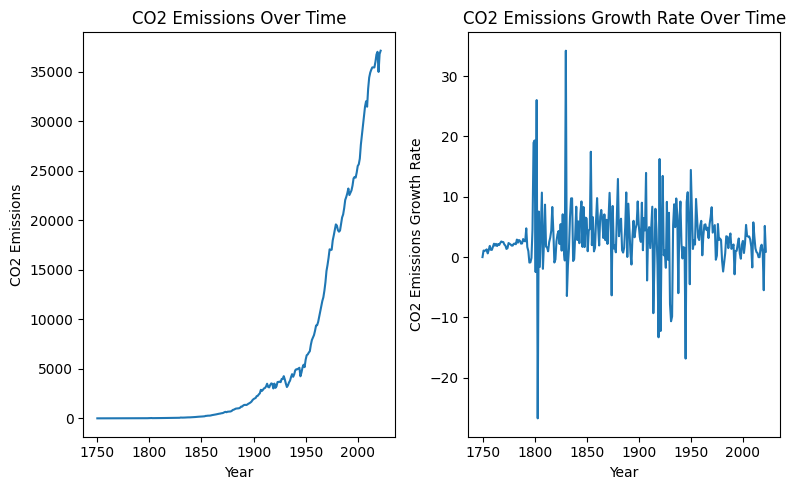

In [36]:
with sqlite3.connect(db_path) as conn:
    co2 = pd.read_sql('SELECT * FROM co2', conn)

figures = plt.figure(figsize=(8, 5))


# First subplot for CO2 emissions over time
plt.subplot(1, 2, 1)  # (rows, columns, subplot number)
plt.plot(co2['year'], co2['co2'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Over Time')

# Second subplot for CO2 increase rate over time
plt.subplot(1, 2, 2)  # (rows, columns, subplot number)
plt.plot(co2['year'], co2['co2_growth_prct'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Growth Rate')
plt.title('CO2 Emissions Growth Rate Over Time')

# Display the figure with all subplots
plt.tight_layout()
plt.show()


## How has the temperate in Germany changed?

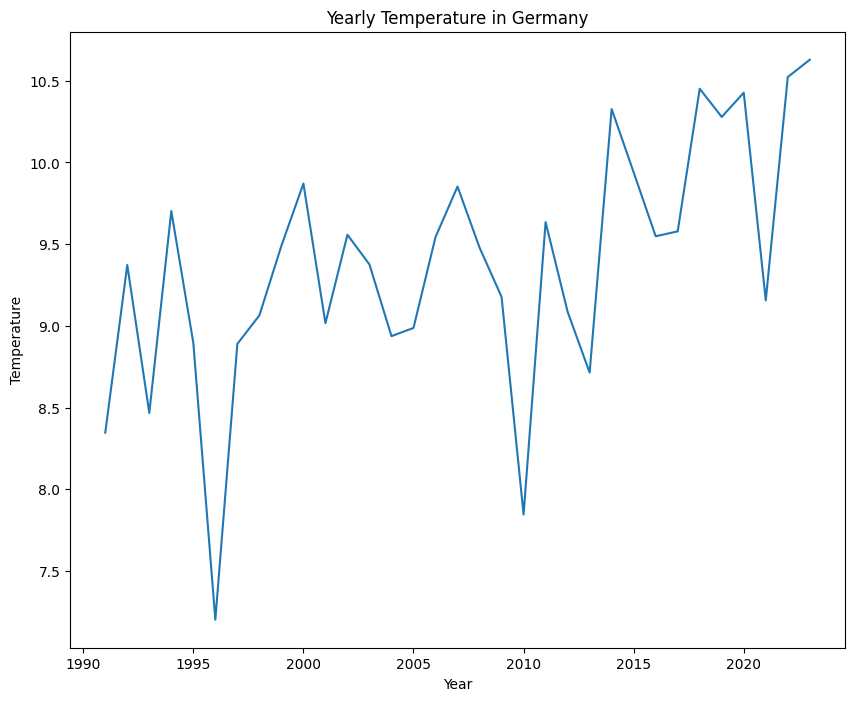

In [44]:
with sqlite3.connect(db_path) as conn:
    temp = pd.read_sql('SELECT * FROM temperature', conn)


yearly_temp = temp.groupby('year').mean()
yearly_temp = yearly_temp.sort_values(by='year')

#plot Deutschland yearly temperature
plt.figure(figsize=(10, 8))
plt.plot(yearly_temp.index, yearly_temp['Deutschland'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Yearly Temperature in Germany')
plt.show()

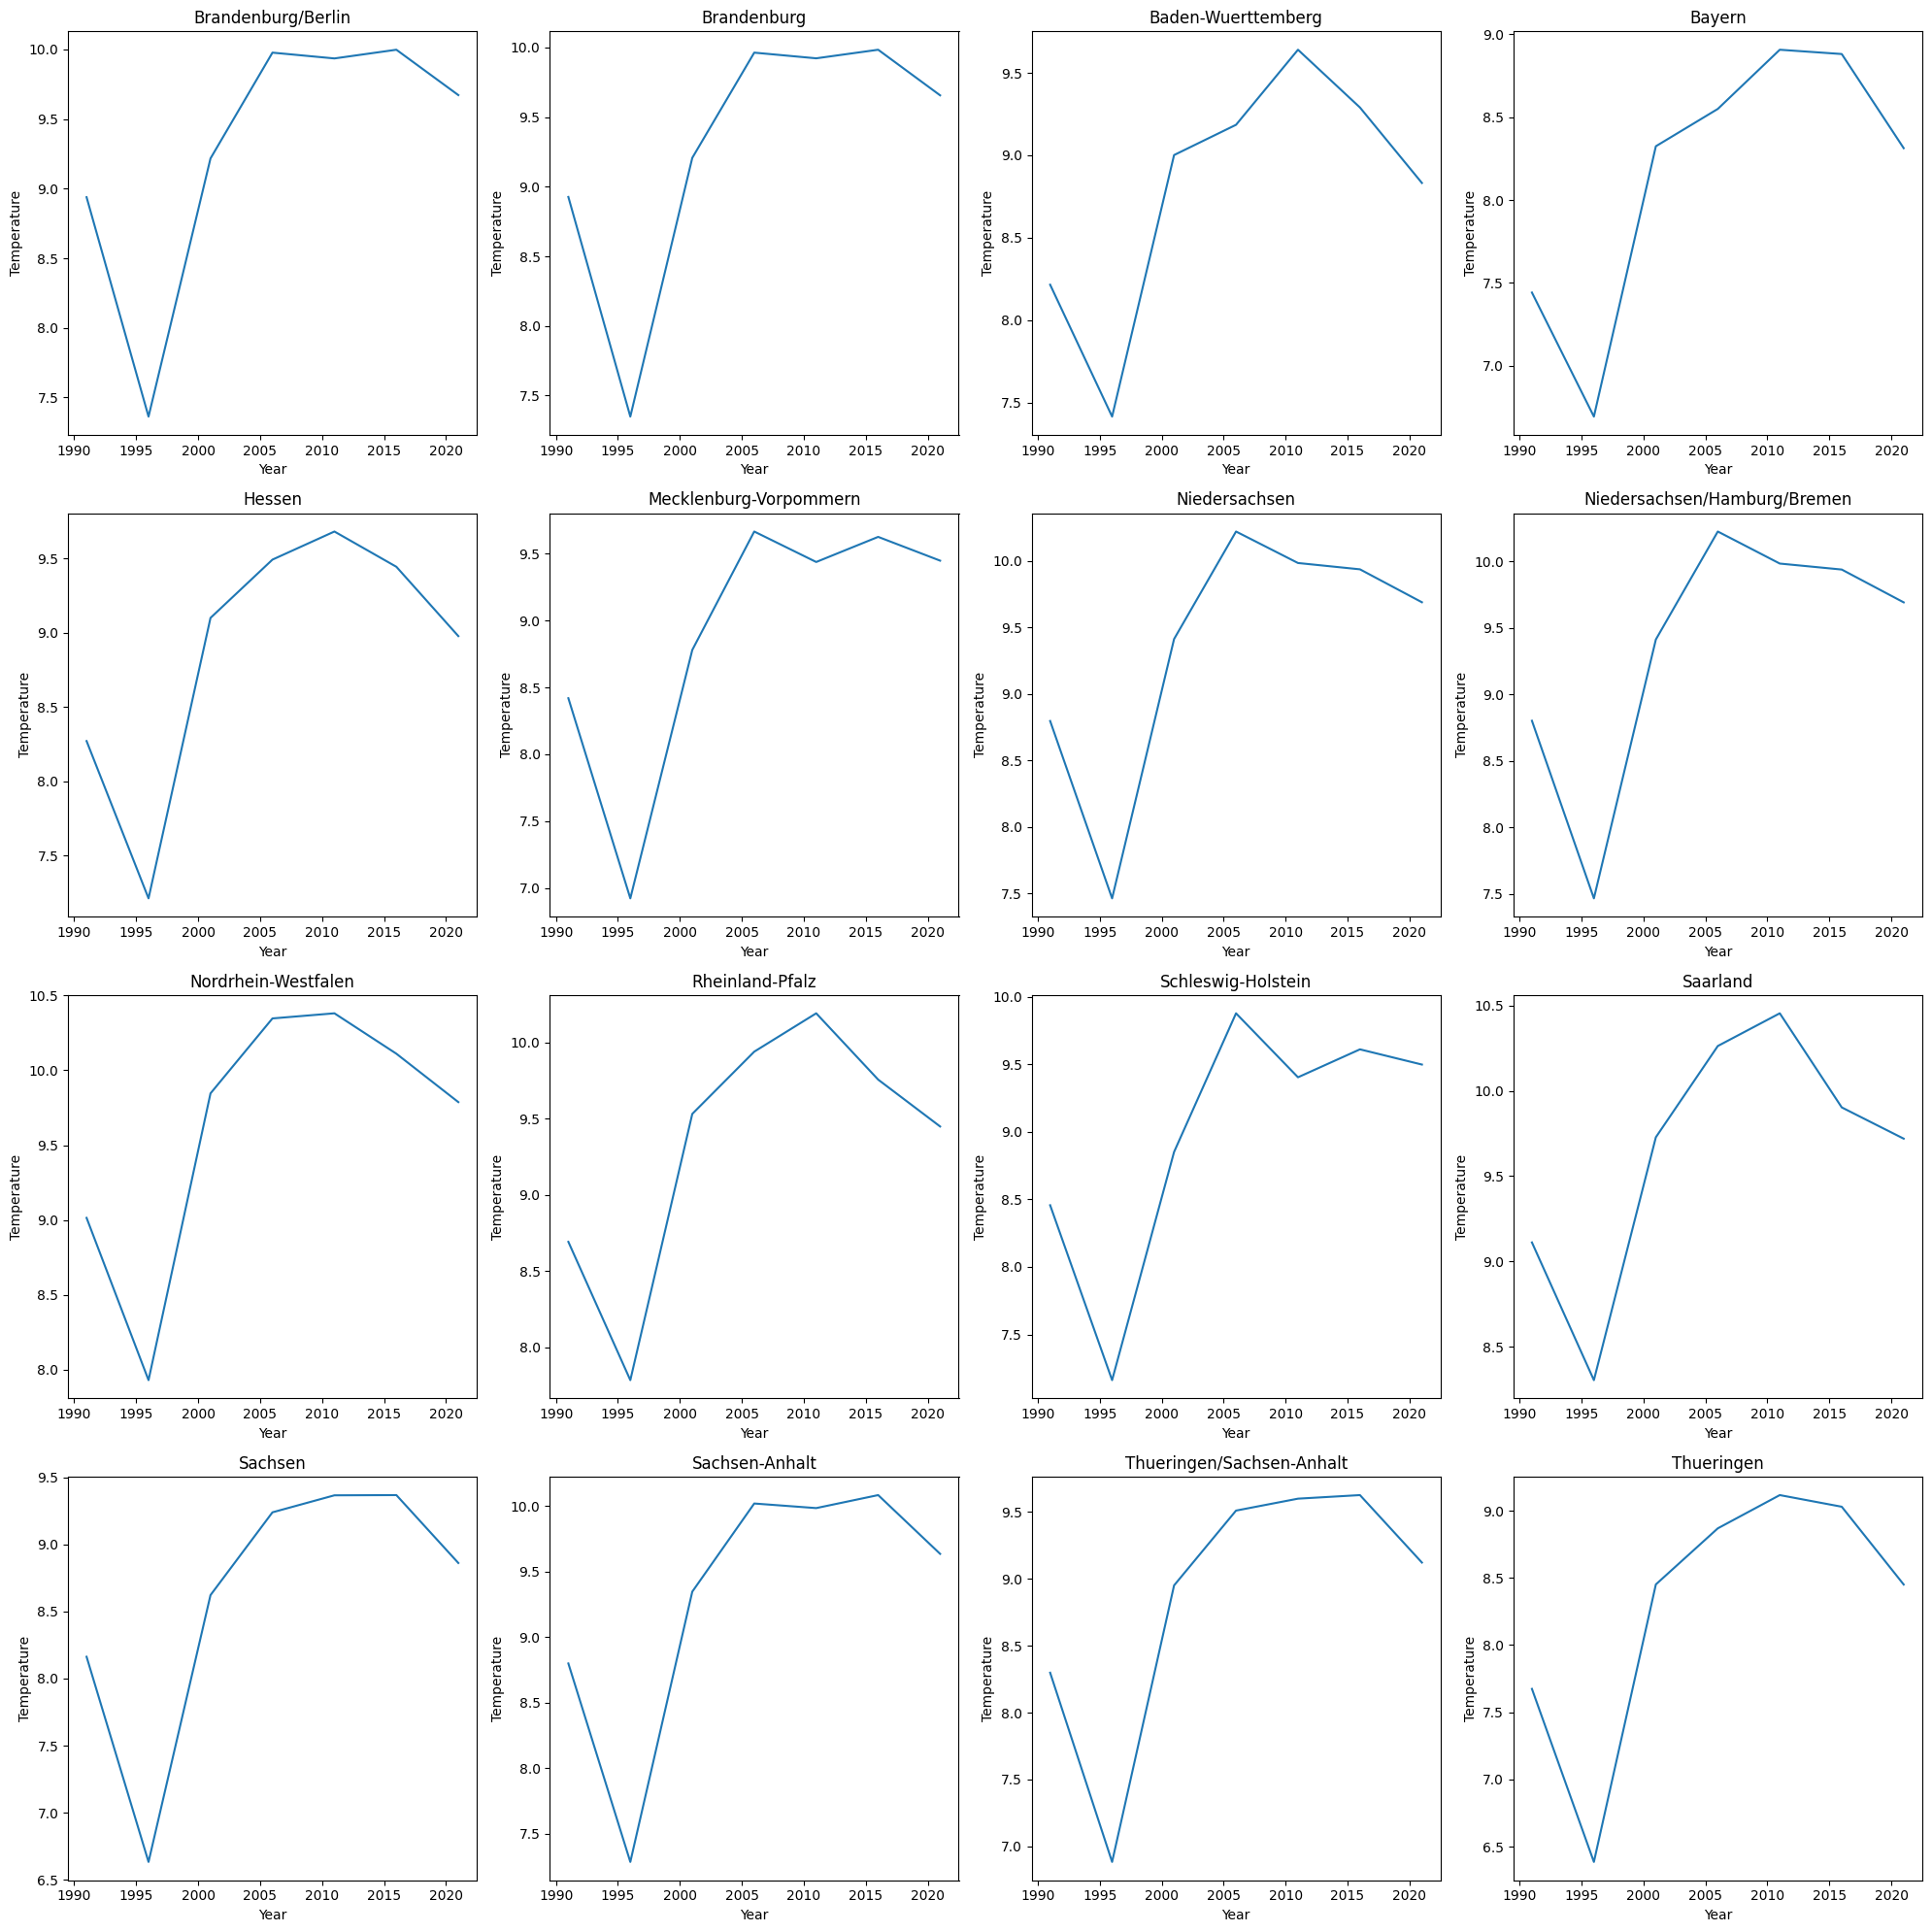

In [45]:
every_5_years_temp = yearly_temp.iloc[::5, :]


# draw temperature for all states using subplots
plt.figure(figsize=(20, 20))
image_per_row = 4

for i,state in enumerate(states):
    plt.subplot(len(states) // image_per_row, image_per_row, i + 1)
    plt.plot(every_5_years_temp.index, every_5_years_temp[state])
    plt.xlabel('Year')
    plt.ylabel('Temperature')
    plt.title(state)
plt.tight_layout()
plt.show()